# 😺 고양이수염 스티커 붙이기

#### "얼굴이 포함된 이미지를 넣으면 고양이 수염을 코에 붙여주는 프로그램 제작"

### 🙃 목차

**1. 사진 준비**   
**2. 얼굴 검출**   
**3. 랜드마크 검출**   
**4. 스티커 붙이기**   
**5. 고찰**(다양한 이미지에 스티커 적용해보기)

---

**모듈 가져오기**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib # HOG feature를 사용해서 얼굴 검출하는데 사용
from IPython.display import Image

### 1. 사진 준비

**경로 설정 / 사진 불러오기 / 크기 조절 / 색 변환**

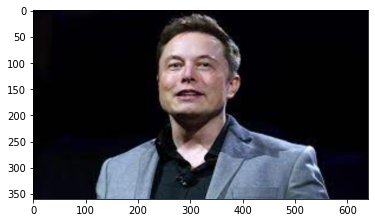

I have bitcoin, ethereum and dogecoin.


In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/aiffel_exploration/E3_data/musk1.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640,360))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 원본 색변환
img_show = img_bgr.copy() # 사본

plt.imshow(img_rgb)
plt.show() # 이미지의 별도 창 실행(IPython Notebooks이 아닌경우 필수)
print("I have bitcoin, ethereum and dogecoin.")

---

### 2. 얼굴 검출

1. **얼굴 영역 좌표 찾기**

In [3]:
detector_hog = dlib.get_frontal_face_detector() # 얼굴 영역 찾는 함수
dlib_rects = detector_hog(img_rgb, 1) # 얼굴 영역 찾기(함수 실행). 두 번째 파라미터는 이미지 피라미드의 수. 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능
print(dlib_rects) # 얼굴 영역 좌표

rectangles[[(239, 67) (368, 196)]]


2. **얼굴 영역 시각화**

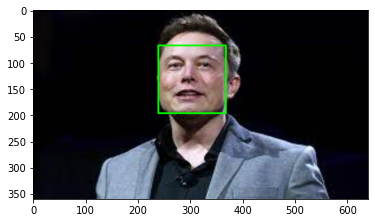

In [4]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left() # 239
    t = dlib_rect.top() # 67
    r = dlib_rect.right() # 368
    b = dlib_rect.bottom() # 196
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA) # 사진, 시작점, 종료점, 색, 두께, 선 종류 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # img_show에 rectangle 적용 후 색변환 해야함 
plt.imshow(img_show_rgb)
plt.show()

---

### 3. 랜드마크 검출

1. shape_predictor_68_face_landmarks.dat 불러오기
2. dlib.shape_predictor() 함수로 객체 반환
3. points(parts) 대신 list_points(x, y)로 변환
4. 얼굴 영역 갯수만큼 list_landmarks에 저장

In [5]:
model_path = os.getenv('HOME')+'/aiffel/aiffel_exploration/E3_data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 이미지와 얼굴영역을 입력받아 객체 반환
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # parts 대신 (x, y)로 접근하도록 변환 
    list_landmarks.append(list_points)

5. landmark 출력

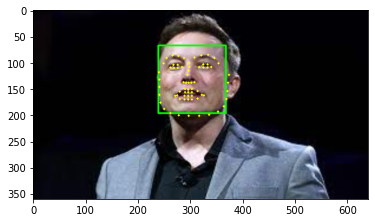

In [6]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # -1은 색채우기
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # img_show가 수정되었으니 마지막에 써줘야함
plt.imshow(img_show_rgb)
plt.show()

---

### 4. 스티커 붙이기

1. **코 좌표(스티커를 붙일 위치) 구하기**

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 랜드마크에서 코 인덱스는 30
    x = landmark[30][0] # 위치
    y = landmark[30][1] # 위치
    w = dlib_rect.width() # 크기
    h = dlib_rect.width() # 크기(정사각형)
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(295, 123)
(x,y) : (295,123)
(w,h) : (130,130)


2. **스티커 크기 조정**

In [8]:
sticker_path = os.getenv('HOME')+'/aiffel/aiffel_exploration/E3_data/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


3. **스티커 위치 조정**

In [9]:
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (230,58)


4. **스티커 붙이기**

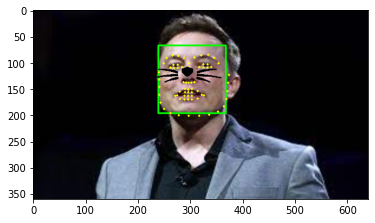

In [10]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],
                        refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0],
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) # 사본. 박스와 랜드마크 존재
plt.show()

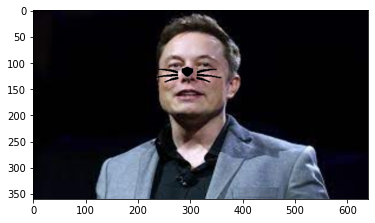

In [11]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0],
                        refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0],
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # 원본
plt.show()

---

### 5. 고찰

#### 결론
1. **촬영거리:** 거리가 멀더라도 얼굴을 잘 인식하는 편이다.
2. **얼굴각도:** 정면 사진이 아닌 경우 인식률이 낮아짐을 알 수 있다.
3. **그외:** 일부 가려지거나 그늘이 지더라도 얼굴을 잘 인식하는 편이다.

#### 보강할 점
1. 정면 사진이 아니더라도 스티커를 붙이는 방법에 대해 공부 예정
2. 얼굴 각도에 따라 스티커를 함께 회전시키는 방법에 대해 공부 예정

1. **멀리서 찍은 사진**

- 얼굴 영역 크기에 맞춰 스티커가 잘 붙음을 확인할 수 있습니다.

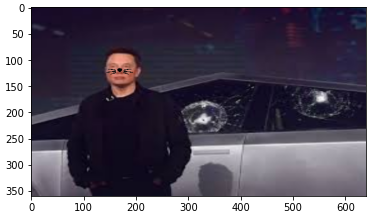

In [12]:
Image("E3_data/E3_image/musk11.png")

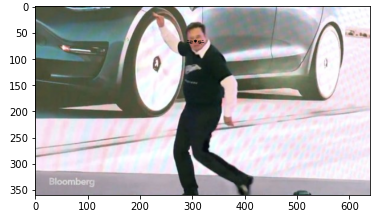

In [13]:
Image("E3_data/E3_image/musk12.png")

2. **각도가 다른 사진**

- 두 사진 모두 스티커가 붙지 않았습니다. 각도가 얼굴 인식에 큰 영향을 미친다고 생각합니다.

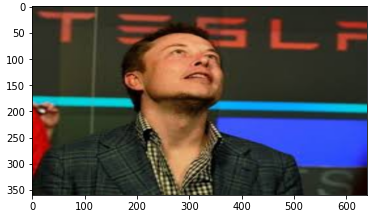

In [14]:
Image("E3_data/E3_image/musk21.png")

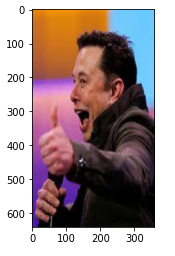

In [15]:
Image("E3_data/E3_image/musk22.png")

3. **그외**

- **흑백:** 흑백사진의 경우 문제없이 스티커가 잘 붙음을 확인할 수 있습니다.
- **연기:** 연기가 얼굴을 조금 가려도 스티커가 잘 붙음을 확인할 수 있습니다.
- **그늘:** 손그림자가 져도 스티커가 잘 붙음을 확인할 수 있습니다.
- **도지:** 도지는 안되는군요..😥

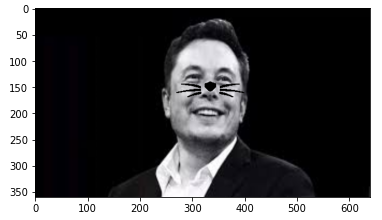

In [16]:
Image("E3_data/E3_image/musk2.png")

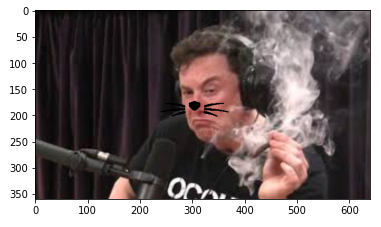

In [17]:
Image("E3_data/E3_image/musk3.png")

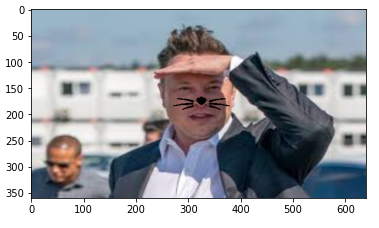

In [18]:
Image("E3_data/E3_image/musk4.png")

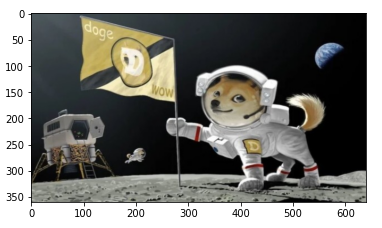

In [19]:
Image("E3_data/E3_image/musk5.png")